In [21]:
import pandas as pd
import pandas_profiling as pp
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv('220511_monatszahlenmonatszahlen2204_verkehrsunfaelle.csv')
df

MONATSZAHL             AUSPRAEGUNG  JAHR   MONAT   WERT  \
0      Alkoholunfälle               insgesamt  2022  202201    NaN   
1      Alkoholunfälle               insgesamt  2022  202202    NaN   
2      Alkoholunfälle               insgesamt  2022  202203    NaN   
3      Alkoholunfälle               insgesamt  2022  202204    NaN   
4      Alkoholunfälle               insgesamt  2022  202205    NaN   
...               ...                     ...   ...     ...    ...   
2081  Verkehrsunfälle  Verletzte und Getötete  2000  200008  647.0   
2082  Verkehrsunfälle  Verletzte und Getötete  2000  200009  675.0   
2083  Verkehrsunfälle  Verletzte und Getötete  2000  200010  615.0   
2084  Verkehrsunfälle  Verletzte und Getötete  2000  200011  578.0   
2085  Verkehrsunfälle  Verletzte und Getötete  2000  200012  515.0   

      VORJAHRESWERT  VERAEND_VORMONAT_PROZENT  VERAEND_VORJAHRESMONAT_PROZENT  \
0              16.0                       NaN                             NaN   
1              14.0                       NaN                             NaN   
2              24.0                       NaN                             NaN   
3              16.0                       NaN                             NaN   
4              24.0                       NaN                             NaN   
...             ...                       ...                             ...   
2081            NaN                    -13.04                             NaN   
2082            NaN                      4.33                             NaN   
2083            NaN                     -8.89                             NaN   
2084            NaN                     -6.02                             NaN   
2085            NaN                    -10.90                             NaN   

      ZWOELF_MONATE_MITTELWERT  
0                          NaN  
1                          NaN  
2                          NaN  
3                          NaN  
4                          NaN  
...                        ...  
2081                     584.0  
2082                     594.0  
2083                     596.0  
2084                     594.0  
2085                     588.0  

[2086 rows x 9 columns]

In [15]:
# Get first 5 columns
df = df.iloc[:,:5]
df

MONATSZAHL             AUSPRAEGUNG  JAHR   MONAT   WERT
0      Alkoholunfälle               insgesamt  2022  202201    NaN
1      Alkoholunfälle               insgesamt  2022  202202    NaN
2      Alkoholunfälle               insgesamt  2022  202203    NaN
3      Alkoholunfälle               insgesamt  2022  202204    NaN
4      Alkoholunfälle               insgesamt  2022  202205    NaN
...               ...                     ...   ...     ...    ...
2081  Verkehrsunfälle  Verletzte und Getötete  2000  200008  647.0
2082  Verkehrsunfälle  Verletzte und Getötete  2000  200009  675.0
2083  Verkehrsunfälle  Verletzte und Getötete  2000  200010  615.0
2084  Verkehrsunfälle  Verletzte und Getötete  2000  200011  578.0
2085  Verkehrsunfälle  Verletzte und Getötete  2000  200012  515.0

[2086 rows x 5 columns]

In [16]:
df.dtypes

MONATSZAHL      object
AUSPRAEGUNG     object
JAHR             int64
MONAT           object
WERT           float64
dtype: object

In [17]:
# Filter data till 2020. Store 2021 onwards data in test df 
test_df = df[df['JAHR'] > 2020]
display(test_df)
df = df[df['JAHR'] <= 2020]
df

MONATSZAHL             AUSPRAEGUNG  JAHR   MONAT   WERT
0      Alkoholunfälle               insgesamt  2022  202201    NaN
1      Alkoholunfälle               insgesamt  2022  202202    NaN
2      Alkoholunfälle               insgesamt  2022  202203    NaN
3      Alkoholunfälle               insgesamt  2022  202204    NaN
4      Alkoholunfälle               insgesamt  2022  202205    NaN
...               ...                     ...   ...     ...    ...
1808  Verkehrsunfälle  Verletzte und Getötete  2021  202108  531.0
1809  Verkehrsunfälle  Verletzte und Getötete  2021  202109  678.0
1810  Verkehrsunfälle  Verletzte und Getötete  2021  202110  561.0
1811  Verkehrsunfälle  Verletzte und Getötete  2021  202111  430.0
1812  Verkehrsunfälle  Verletzte und Getötete  2021  202112  340.0

[175 rows x 5 columns]

MONATSZAHL             AUSPRAEGUNG  JAHR   MONAT   WERT
25     Alkoholunfälle               insgesamt  2020   Summe  430.0
26     Alkoholunfälle               insgesamt  2020  202001   28.0
27     Alkoholunfälle               insgesamt  2020  202002   40.0
28     Alkoholunfälle               insgesamt  2020  202003   27.0
29     Alkoholunfälle               insgesamt  2020  202004   26.0
...               ...                     ...   ...     ...    ...
2081  Verkehrsunfälle  Verletzte und Getötete  2000  200008  647.0
2082  Verkehrsunfälle  Verletzte und Getötete  2000  200009  675.0
2083  Verkehrsunfälle  Verletzte und Getötete  2000  200010  615.0
2084  Verkehrsunfälle  Verletzte und Getötete  2000  200011  578.0
2085  Verkehrsunfälle  Verletzte und Getötete  2000  200012  515.0

[1911 rows x 5 columns]

In [18]:
# Changing month to number
df_year = df[df['MONAT'] == 'Summe']
display(df_year)

df_month = df[df['MONAT'] != 'Summe']
df_month['MONAT'] = df_month['MONAT'].apply(lambda x: int(str(x)[-2:]))
display(df_month)

MONATSZAHL             AUSPRAEGUNG  JAHR  MONAT    WERT
25     Alkoholunfälle               insgesamt  2020  Summe   430.0
38     Alkoholunfälle               insgesamt  2019  Summe   434.0
51     Alkoholunfälle               insgesamt  2018  Summe   398.0
64     Alkoholunfälle               insgesamt  2017  Summe   409.0
77     Alkoholunfälle               insgesamt  2016  Summe   301.0
...               ...                     ...   ...    ...     ...
2021  Verkehrsunfälle  Verletzte und Getötete  2004  Summe  6219.0
2034  Verkehrsunfälle  Verletzte und Getötete  2003  Summe  6365.0
2047  Verkehrsunfälle  Verletzte und Getötete  2002  Summe  7026.0
2060  Verkehrsunfälle  Verletzte und Getötete  2001  Summe  7452.0
2073  Verkehrsunfälle  Verletzte und Getötete  2000  Summe  7053.0

[147 rows x 5 columns]

/var/folders/vt/8vmvzc712931z9nsx9wnm7s80000gn/T/ipykernel_30551/672648537.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_month['MONAT'] = df_month['MONAT'].apply(lambda x: int(str(x)[-2:]))


MONATSZAHL             AUSPRAEGUNG  JAHR  MONAT   WERT
26     Alkoholunfälle               insgesamt  2020      1   28.0
27     Alkoholunfälle               insgesamt  2020      2   40.0
28     Alkoholunfälle               insgesamt  2020      3   27.0
29     Alkoholunfälle               insgesamt  2020      4   26.0
30     Alkoholunfälle               insgesamt  2020      5   40.0
...               ...                     ...   ...    ...    ...
2081  Verkehrsunfälle  Verletzte und Getötete  2000      8  647.0
2082  Verkehrsunfälle  Verletzte und Getötete  2000      9  675.0
2083  Verkehrsunfälle  Verletzte und Getötete  2000     10  615.0
2084  Verkehrsunfälle  Verletzte und Getötete  2000     11  578.0
2085  Verkehrsunfälle  Verletzte und Getötete  2000     12  515.0

[1764 rows x 5 columns]

# EDA
## Pandas Profiling Analysis

In [9]:
# Pandas Profiling Report
profile = pp.ProfileReport(df)
profile

Render HTML: 100%|████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.05s/it]


In [19]:
profile_year = pp.ProfileReport(df_year)
profile_year

Render HTML: 100%|████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.28it/s]


In [20]:
profile_month = pp.ProfileReport(df_month)
profile_month

Render HTML: 100%|████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.05s/it]


## Categorical Variable Analysis

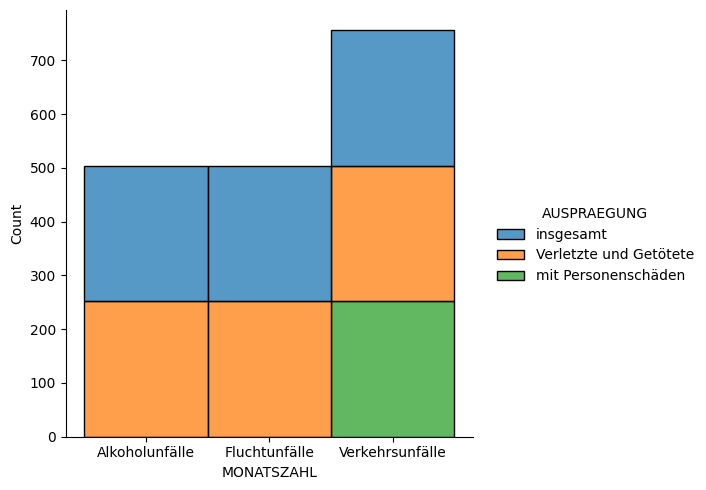

In [97]:
# Value Counts using stacked bar plots
sns.displot(data=df_month, x='MONATSZAHL', hue='AUSPRAEGUNG', multiple='stack')
plt.show()

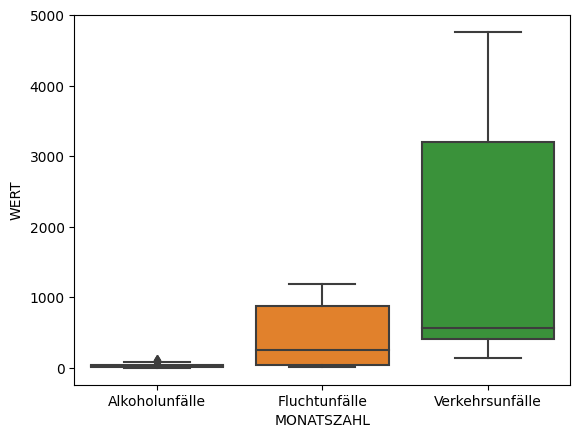

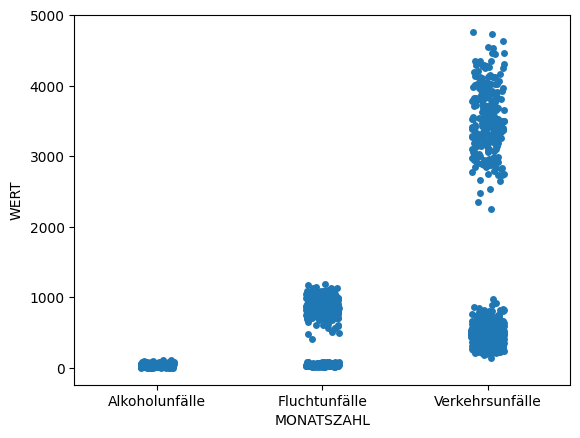

'\nInferences from Strip Plot:-\n1. Escape and Traffic Accidents making 2 clusters. \nNeed to go into detail what factor/variable in causing this clustering\n'

In [51]:
# Box Plot of values category wise: Primitive
sns.boxplot(data=df_month, x='MONATSZAHL', y='WERT')
plt.show()

'''
Inferences from Box Plot:- 
1. Distribution variation different for every Category (Order: Alcohol<Escape<Traffic)
2. Increasing Order of Means same as above
''' 

# Strip Plot of values category wise: Gives better understanding
sns.stripplot(data=df_month, x='MONATSZAHL', y='WERT')
plt.show()

'''
Inferences from Strip Plot:-
1. Escape and Traffic Accidents making 2 clusters. 
Need to go into detail what factor/variable in causing this clustering
'''

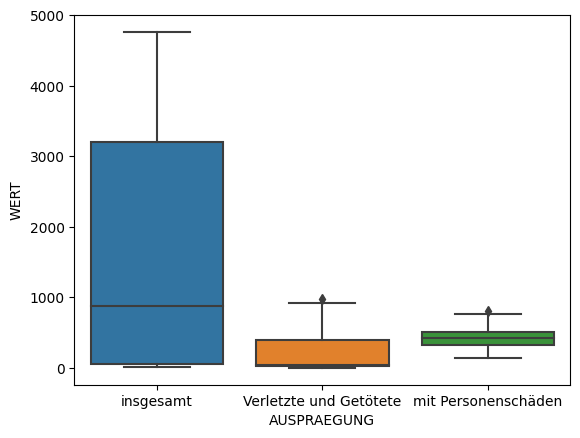

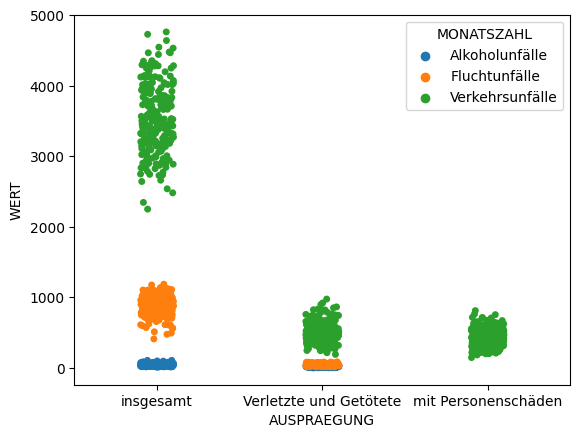

'\nInferences:-\n1. Distribution variation similar for Injured & Killed, Personal Injury. Total Distribution more variation.\n2. Increasing Order of Means: Injured & Killed < Personal Injury < Total\n'

In [52]:
# Box Plot of values accident-type wise
sns.boxplot(data=df_month, x='AUSPRAEGUNG', y='WERT')
plt.show()

'''
Inferences:-
1. Distribution variation similar for Injured & Killed, Personal Injury. Total Distribution more variation.
2. Increasing Order of Means: Injured & Killed < Personal Injury < Total
'''

# Strip Plot of values accident-type wise
sns.stripplot(data=df_month, x='AUSPRAEGUNG', y='WERT', hue = 'MONATSZAHL')
plt.show()

'''
Inferences:-
1. 'Total' accident-type has visibly separate clusters denoting each Category.
2. For 'Injured & Killed', Alcohol and Escape Accident clusters overlapping.
3. 'Personal Injury' has only one cluster: Traffic Accident Category.
'''

## Time-Series Analysis

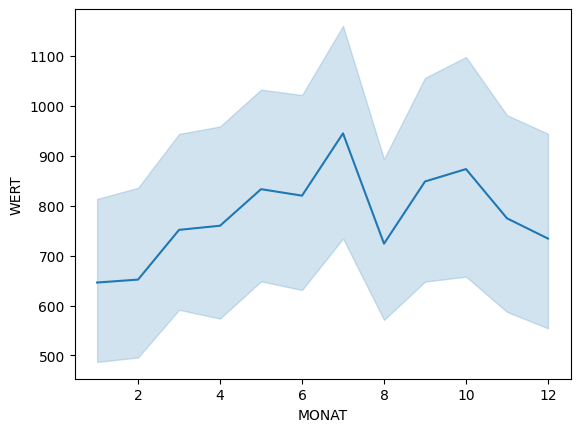

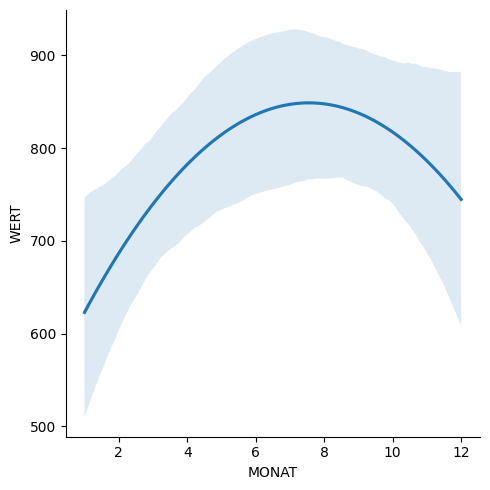

In [86]:
# Month-Wise Distribution: Line/Regression Plot
sns.lineplot(data=df_month, x='MONAT', y='WERT')
plt.show()

'''
Inference:-
1. Stable Increasing trend for more than half a year (first half)
2. Irregular decreasing trend after July(7)
Might help making a regression plot here that prevents overfitting
'''

sns.lmplot(data=df_month, x='MONAT', y='WERT', order=2, scatter=False)
plt.show()

'''
Inferences:-
1. Regression Plot of order 2 shows a parabolic shape peaking around July as we expected.
'''

Alkoholunfälle and insgesamt


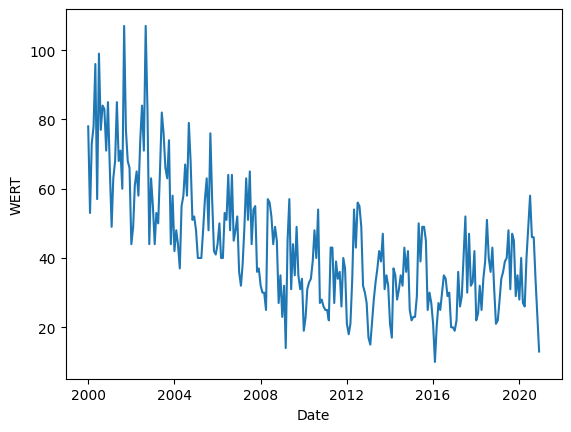

Alkoholunfälle and Verletzte und Getötete


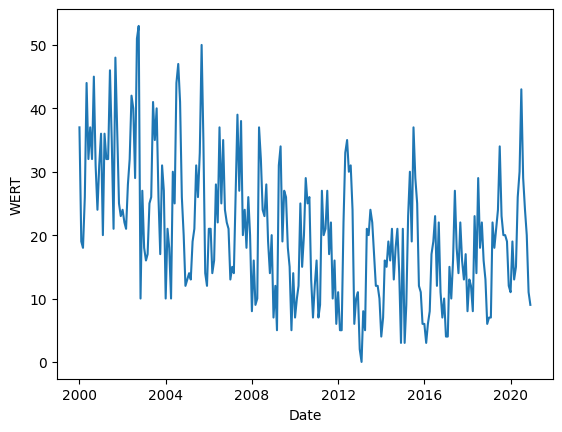

Fluchtunfälle and insgesamt


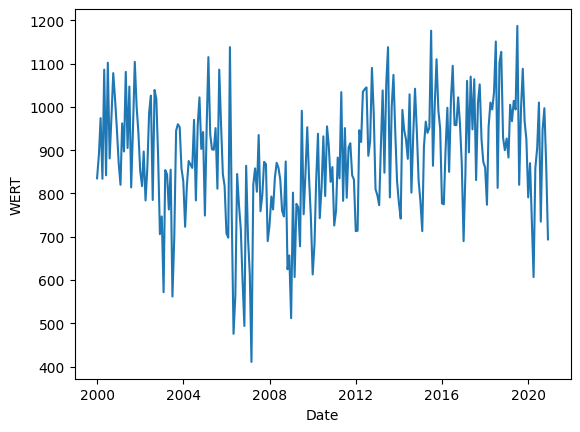

Fluchtunfälle and Verletzte und Getötete


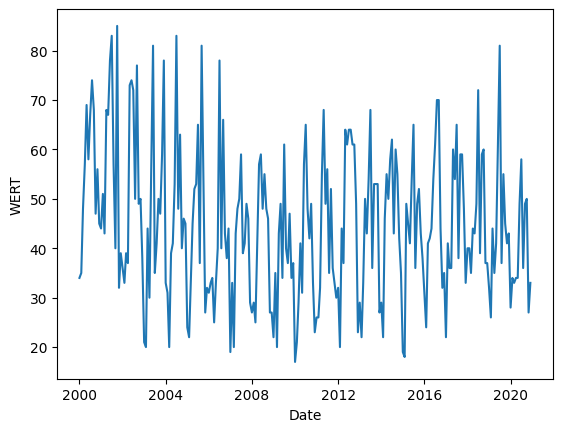

Verkehrsunfälle and insgesamt


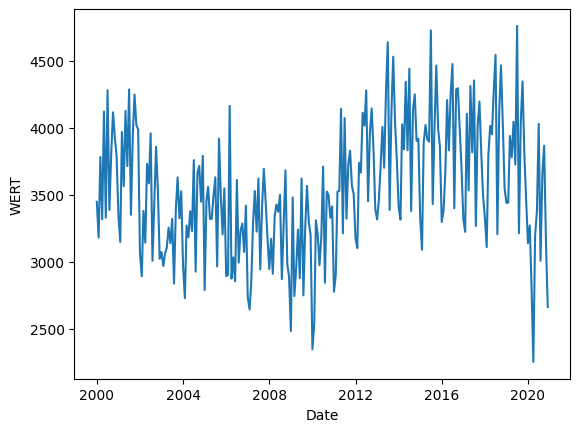

Verkehrsunfälle and mit Personenschäden


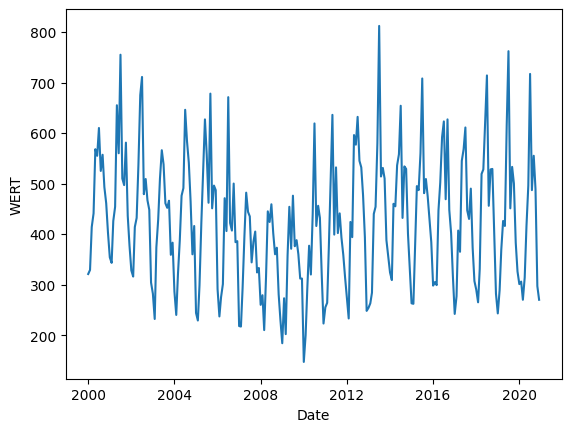

Verkehrsunfälle and Verletzte und Getötete


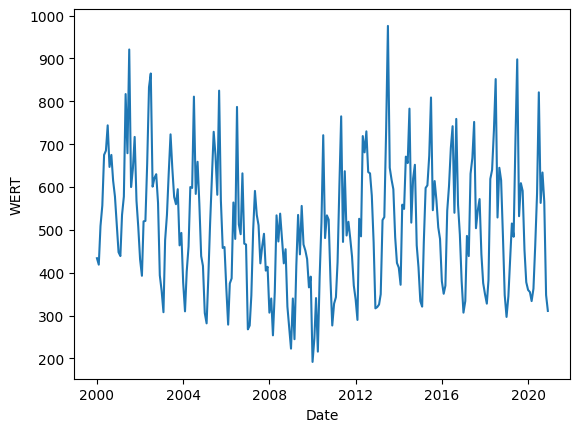

In [101]:
# Time-Series Line plot for every Category & Accident-Type pair
temp = df_month.copy()
temp['MONAT'] = temp['MONAT'].apply(lambda x: '0'+str(x) if x<10 else str(x))
temp['Date'] = temp.apply(lambda x: str(x['JAHR']) + str(x['MONAT']) + '01', axis = 1)
temp['Date'] = pd.to_datetime(temp['Date'])

for cat in df_month['MONATSZAHL'].unique():
    for acc in temp[temp['MONATSZAHL'] == cat]['AUSPRAEGUNG'].unique():
        print(cat, 'and', acc)
        temp2=temp[(temp['MONATSZAHL'] == cat) & (temp['AUSPRAEGUNG'] == acc)]
        sns.lineplot(data = temp2, x='Date', y='WERT')
        plt.show()
#         temp2['Date'] = pd.to_numeric(temp2['Date'])
#         sns.lmplot(data = temp2, x='Date', y='WERT', x_bins=5)
#         plt.show()

# Modelling

# Appendix

In [ ]:
# Going deeper into every accident-type
for acc in df_month['AUSPRAEGUNG'].unique():
    print(acc)
    sns.stripplot(data=df_month[df_month['AUSPRAEGUNG'] == acc], y='WERT', x='MONATSZAHL')
    plt.show()

In [ ]:
# Going deeper into every category
for cat in df_month['MONATSZAHL'].unique():
    print(cat)
    sns.stripplot(data=df_month[df_month['MONATSZAHL'] == cat], y='WERT', x='AUSPRAEGUNG')
    plt.show()

In [ ]:
# Line/Scatter plot total accidents in a year: Didn't give much insight
temp = df_year.copy()
temp['JAHR'] = temp['JAHR'].apply(lambda x: str(x)+'0101')
temp['JAHR'] = pd.to_datetime(temp['JAHR'])

sns.lineplot(data = temp, x = 'JAHR', y = 'WERT', hue='MONATSZAHL')
plt.show()
sns.scatterplot(data = temp, x = 'JAHR', y = 'WERT', hue='MONATSZAHL')
plt.show()

sns.lineplot(data = temp, x = 'JAHR', y = 'WERT', hue='AUSPRAEGUNG')
plt.show()
sns.scatterplot(data = temp, x = 'JAHR', y = 'WERT', hue='AUSPRAEGUNG')
plt.show()